In [ ]:
# #Dat Cleaning
# eda
# data visua;lization
# #Model Building
# #performbnace Analysis


QUALITY EDUCATION

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [40]:
path = 'drive/My Drive/Colab Notebooks/8.csv'
import pandas as pd
df = pd.read_csv(path)
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
             School Type            India/ State/ UTs  2001  2002  2003  2004  \
0         Primary School  Andaman and Nicobar Islands  1.00  0.95  0.95  0.98   
1         Primary School               Andhra Pradesh  0.99  1.01  1.01  1.01   
2         Primary School            Arunachal Pradesh  0.83  0.88  0.90  0.89   
3         Primary School                        Assam  0.84  0.97  1.00  0.99   
4         Primary School                        Bihar  0.64  0.81  0.80  0.75   
..                   ...                          ...   ...   ...   ...   ...   
66  Upper Primary School                   Tamil Nadu  0.98  0.98  0.96  0.96   
67  Upper Primary School                      Tripura  0.87  0.94  0.93  0.94   
68  Upper Primary School                Uttar Pradesh  0.50  0.80  0.80  0.80   
69  Upper Primary School                  Uttarakhand  0.95  0.93  0.98  1.00   
70  Upper Primary School                  West Bengal  0.78  0.92  0.95

In [41]:
#To read only first 5 rows
df.head()


,School Type,India/ State/ UTs,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Primary School,Andaman and Nicobar Islands,1.00,0.95,0.95,0.98,1.00,1.02,1.06,1.00,0.98,0.97
1,Primary School,Andhra Pradesh,0.99,1.01,1.01,1.01,1.01,1.00,1.00,1.01,1.00,1.00
2,Primary School,Arunachal Pradesh,0.83,0.88,0.90,0.89,0.90,0.90,0.92,0.95,0.96,0.96
3,Primary School,Assam,0.84,0.97,1.00,0.99,1.00,1.02,1.00,1.00,1.03,1.03
4,Primary School,Bihar,0.64,0.81,0.80,0.75,0.75,0.77,0.82,0.84,0.87,0.94


In [ ]:
#To read only last 5 rows
df.tail()

,School Type,India/ State/ UTs,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
67,Upper Primary School,Tamil Nadu,0.98,0.98,0.96,0.96,0.97,0.98,0.97,0.97,0.98,0.99
68,Upper Primary School,Tripura,0.87,0.94,0.93,0.94,0.99,1.00,1.00,0.99,1.00,0.99
69,Upper Primary School,Uttar Pradesh,0.50,0.80,0.80,0.80,0.79,0.79,0.90,0.90,0.89,0.90
70,Upper Primary School,Uttarakhand,0.95,0.93,0.98,1.00,1.01,1.02,1.04,1.07,1.07,1.07
71,Upper Primary School,West Bengal,0.78,0.92,0.95,0.91,0.88,1.03,1.03,1.03,1.08,1.04


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

DATA CLEANING

In [42]:
df1 = df.dropna(inplace = True)
print(df1)

None


In [ ]:
s = (df['School Type'] == 'Primary School')
print('series object:', s)
result = df[s] # Using boolean indexing to select all rows with 'Primary School'

print(result)

series object: 1      True
2      True
3      True
4      True
5      True
      ...  
67    False
68    False
69    False
70    False
71    False
Name: School Type, Length: 70, dtype: bool
       School Type            India/ State/ UTs   2001   2002  2003  2004  \
1   Primary School  Andaman and Nicobar Islands   1.00   0.95  0.95  0.98   
2   Primary School               Andhra Pradesh   0.99   1.01  1.01  1.01   
3   Primary School            Arunachal Pradesh   0.83   0.88  0.90  0.89   
4   Primary School                        Assam   0.84   0.97  1.00  0.99   
5   Primary School                        Bihar   0.64   0.81  0.80  0.75   
6   Primary School                   Chandigarh   0.97   0.98  0.98  0.90   
7   Primary School                 Chhattisgarh   0.87   0.95  0.99  0.94   
8   Primary School       Dadra and Nagar Haveli   0.72   0.86  0.88  0.93   
9   Primary School                Daman and Diu   0.81   0.96  0.99  0.88   
10  Primary School                      

In [74]:
s = (df['School Type'] == 'Upper Primary School')
print('series object:', s)
result = df[s] # Using boolean indexing to select all rows with 'Primary School'

print(result)

series object: 0     False
1     False
2     False
3     False
4     False
      ...  
66     True
67     True
68     True
69     True
70     True
Name: School Type, Length: 71, dtype: bool
             School Type            India/ State/ UTs  2001  2002  2003  2004  \
35  Upper Primary School                        India   NaN   NaN   NaN   NaN   
36  Upper Primary School  Andaman and Nicobar Islands  0.97  0.93  0.91  1.06   
37  Upper Primary School               Andhra Pradesh  0.86  0.92  0.93  0.95   
38  Upper Primary School            Arunachal Pradesh  0.89  0.88  0.87  0.85   
39  Upper Primary School                        Assam  0.79  0.97  0.93  0.93   
40  Upper Primary School                        Bihar  0.55  0.62  0.63  0.61   
41  Upper Primary School                   Chandigarh  1.10  1.01  1.01  1.11   
42  Upper Primary School                 Chhattisgarh  0.72  0.79  0.79  0.79   
43  Upper Primary School       Dadra and Nagar Haveli  0.62  0.66  0.69  0.74   


In [ ]:
df.rename(columns={'India/ State/ UTs':'States'},inplace=True)
df

,School Type,States,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Primary School,Andaman and Nicobar Islands,1.00,0.95,0.95,0.98,1.00,1.02,1.06,1.00,0.98,0.97
2,Primary School,Andhra Pradesh,0.99,1.01,1.01,1.01,1.01,1.00,1.00,1.01,1.00,1.00
3,Primary School,Arunachal Pradesh,0.83,0.88,0.90,0.89,0.90,0.90,0.92,0.95,0.96,0.96
4,Primary School,Assam,0.84,0.97,1.00,0.99,1.00,1.02,1.00,1.00,1.03,1.03
5,Primary School,Bihar,0.64,0.81,0.80,0.75,0.75,0.77,0.82,0.84,0.87,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Upper Primary School,Tamil Nadu,0.98,0.98,0.96,0.96,0.97,0.98,0.97,0.97,0.98,0.99
68,Upper Primary School,Tripura,0.87,0.94,0.93,0.94,0.99,1.00,1.00,0.99,1.00,0.99
69,Upper Primary School,Uttar Pradesh,0.50,0.80,0.80,0.80,0.79,0.79,0.90,0.90,0.89,0.90
70,Upper Primary School,Uttarakhand,0.95,0.93,0.98,1.00,1.01,1.02,1.04,1.07,1.07,1.07


EDA

In [ ]:
#Mean
list = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in list:
  print('Mean for ',i ,'= ',df[i].mean())



Mean for  2001 =  2.0704285714285713
Mean for  2002 =  2.2868571428571425
Mean for  2003 =  0.9314285714285715
Mean for  2004 =  0.9475714285714285
Mean for  2005 =  0.9470000000000001
Mean for  2006 =  0.9504285714285714
Mean for  2007 =  0.9537142857142857
Mean for  2008 =  0.9807142857142855
Mean for  2009 =  0.9872857142857143
Mean for  2010 =  0.9947142857142857


In [ ]:
#median
list = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in list:
  print('Median for ',i ,'= ',df[i].median())

Median for  2001 =  0.87
Median for  2002 =  0.95
Median for  2003 =  0.955
Median for  2004 =  0.96
Median for  2005 =  0.96
Median for  2006 =  0.965
Median for  2007 =  0.97
Median for  2008 =  0.98
Median for  2009 =  0.985
Median for  2010 =  0.99


In [ ]:
#Mode
list = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in list:
  print('Mode for ',i ,'= ',df[i].mode())

Mode for  2001 =  0    0.84
1    0.95
dtype: float64
Mode for  2002 =  0    0.95
1    0.98
dtype: float64
Mode for  2003 =  0    0.99
dtype: float64
Mode for  2004 =  0    0.98
dtype: float64
Mode for  2005 =  0    0.96
dtype: float64
Mode for  2006 =  0    0.96
dtype: float64
Mode for  2007 =  0    0.98
dtype: float64
Mode for  2008 =  0    0.97
1    0.98
dtype: float64
Mode for  2009 =  0    0.95
1    0.96
2    0.98
3    1.01
dtype: float64
Mode for  2010 =  0    0.99
dtype: float64


variability measures

In [ ]:
list = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in list:
  print('MIn for ',i ,'= ',df[i].min())

MIn for  2001 =  0.47
MIn for  2002 =  0.59
MIn for  2003 =  0.63
MIn for  2004 =  0.61
MIn for  2005 =  0.64
MIn for  2006 =  0.69
MIn for  2007 =  0.71
MIn for  2008 =  0.7
MIn for  2009 =  0.77
MIn for  2010 =  0.8


In [ ]:
list = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in list:
  print('Max for ',i ,'= ',df[i].max())

Max for  2001 =  86.0
Max for  2002 =  96.0
Max for  2003 =  1.18
Max for  2004 =  1.17
Max for  2005 =  1.17
Max for  2006 =  1.17
Max for  2007 =  1.21
Max for  2008 =  1.19
Max for  2009 =  1.19
Max for  2010 =  1.26


In [ ]:
list = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in list:
  print('Standard Deviation for ',i ,'= ',df[i].std())

Standard Deviation for  2001 =  10.177843716240456
Standard Deviation for  2002 =  11.36364193800729
Standard Deviation for  2003 =  0.09908692881353082
Standard Deviation for  2004 =  0.10654570651903225
Standard Deviation for  2005 =  0.10263697104887183
Standard Deviation for  2006 =  0.09049678854556135
Standard Deviation for  2007 =  0.08555312661802657
Standard Deviation for  2008 =  0.0810138908928484
Standard Deviation for  2009 =  0.06365489902413057
Standard Deviation for  2010 =  0.06813714704515753


IQR using quantile 

In [ ]:
q1 = df[list].quantile(q=0.25)
q3 = df[list].quantile(q=0.75)
iqr = q3 - q1
print('IQR:')
print(np.round(iqr, decimals=2))

IQR:
2001    0.18
2002    0.10
2003    0.09
2004    0.10
2005    0.12
2006    0.10
2007    0.08
2008    0.06
2009    0.07
2010    0.06
dtype: float64


In [ ]:
from scipy import stats

data = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
z_scores = stats.zscore(data)
print("Z-scores:")
print(z_scores)

Z-scores:
[-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


In [53]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/8.csv')

# Specify the column name to plot
column_name = 'actual_column_name'

# Create a box plot using seaborn
if column_name in df.columns:
    sns.catplot(x=column_name, kind='box', data=df)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

# Print the mean, median, and mode of the specified column
if column_name in df.columns:
    print('Mean:', df[column_name].mean())
    print('Median:', df[column_name].median())
    print('Mode:', df[column_name].mode().iloc[0])
else:
    print(f"Column '{column_name}' not found in the DataFrame.")



Column 'actual_column_name' not found in the DataFrame.
Column 'actual_column_name' not found in the DataFrame.


IQR: 0.1499999999999999
IQR: 0.08000000000000007
IQR: 0.07750000000000001
IQR: 0.09499999999999997
IQR: 0.13
IQR: 0.09499999999999997
IQR: 0.125
IQR: 0.06000000000000005
IQR: 0.06250000000000011
IQR: 0.06750000000000012


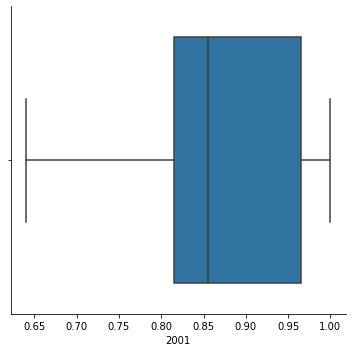

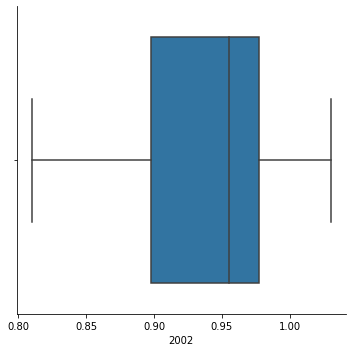

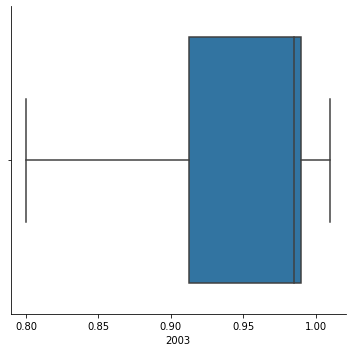

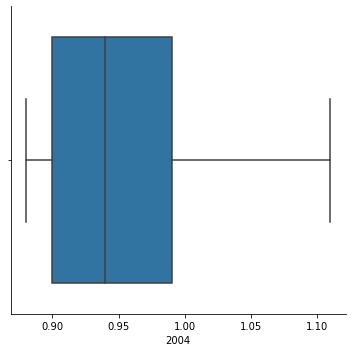

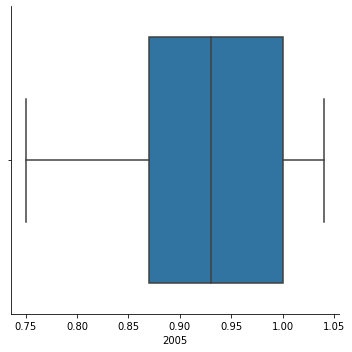

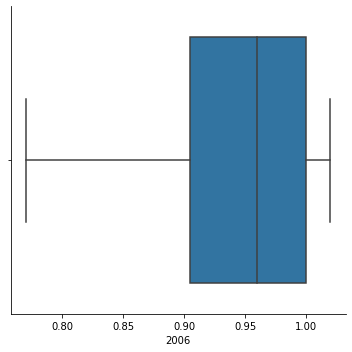

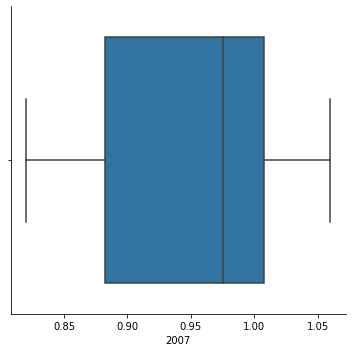

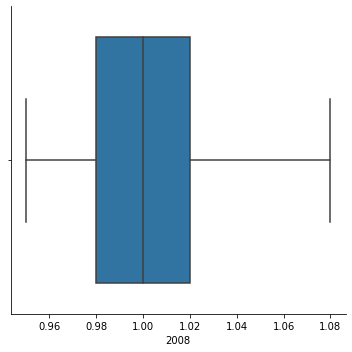

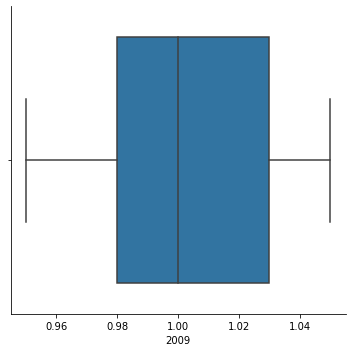

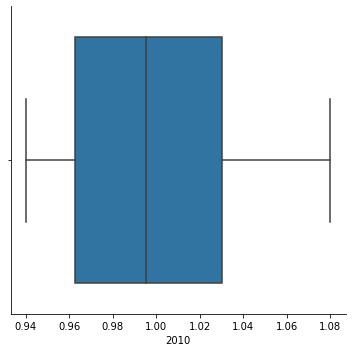

In [49]:

for i in list:
  Q1 = df[i].quantile(0.25)  
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  print('IQR:', IQR)  
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR

  dfout = df[(df[i] > lb) & (df[i] < ub)]
  dfout.shape
  dfout.tail()
  sns.catplot(x=i, kind = 'box',data=dfout)

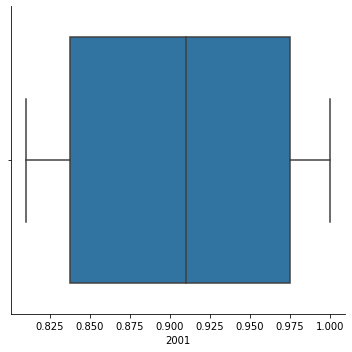

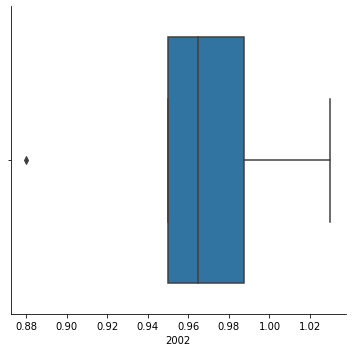

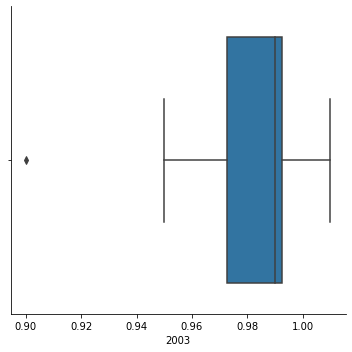

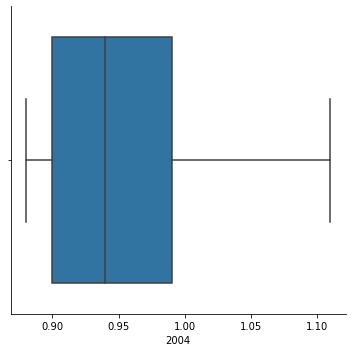

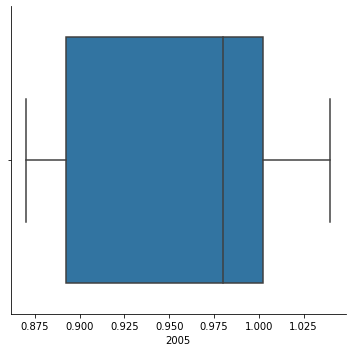

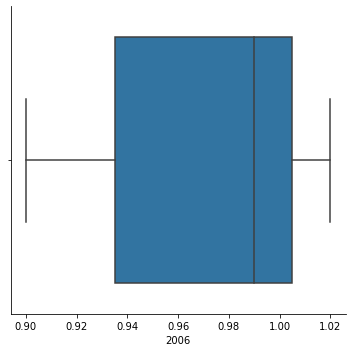

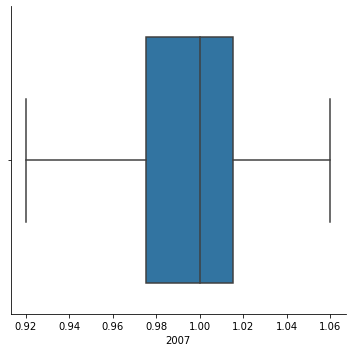

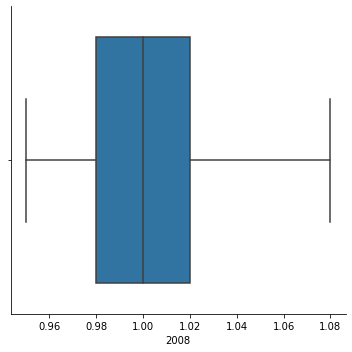

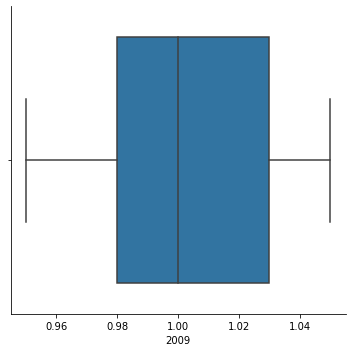

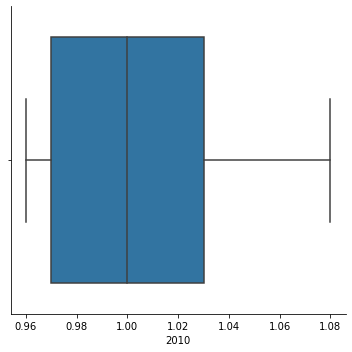

In [50]:
for i in list: 
  zscore=stats.zscore(df[i])
  filter=((zscore > -1) & (zscore < 2))
  newdf=df[filter]
  newdf.tail()
  sns.catplot(x=i,kind='box',data=newdf)

Regression

In [39]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/8.csv')
df.head(10)

,School Type,India/ State/ UTs,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Primary School,Andaman and Nicobar Islands,1.00,0.95,0.95,0.98,1.00,1.02,1.06,1.00,0.98,0.97
1,Primary School,Andhra Pradesh,0.99,1.01,1.01,1.01,1.01,1.00,1.00,1.01,1.00,1.00
2,Primary School,Arunachal Pradesh,0.83,0.88,0.90,0.89,0.90,0.90,0.92,0.95,0.96,0.96
3,Primary School,Assam,0.84,0.97,1.00,0.99,1.00,1.02,1.00,1.00,1.03,1.03
4,Primary School,Bihar,0.64,0.81,0.80,0.75,0.75,0.77,0.82,0.84,0.87,0.94
5,Primary School,Chandigarh,0.97,0.98,0.98,0.90,0.87,0.83,0.87,0.98,0.99,0.99
6,Primary School,Chhattisgarh,0.87,0.95,0.99,0.94,0.77,0.94,0.95,0.95,0.95,0.96
7,Primary School,Dadra and Nagar Haveli,0.72,0.86,0.88,0.93,0.96,0.98,1.01,1.08,1.05,1.03
8,Primary School,Daman and Diu,0.81,0.96,0.99,0.88,0.87,0.92,0.86,1.02,1.04,1.08
9,Primary School,Delhi,0.95,1.03,0.99,1.11,1.04,1.00,1.02,1.02,1.02,1.03


In [44]:
df.isnull().sum()

School Type          0
India/ State/ UTs    0
2001                 0
2002                 0
2003                 0
2004                 0
2005                 0
2006                 0
2007                 0
2008                 0
2009                 0
2010                 0
dtype: int64

In [ ]:
# featureset = df[['Latitude','Longitude','Altitude','min Temo','Max Temp','Sunshine Hour','Solar Radiation']]
# from sklearn.preprocessing import MinMaxScaler
# x = featureset.values #returns a numpy array
# min_max_scaler = MinMaxScaler()
# feature_mtx = min_max_scaler.fit_transform(x)
# feature_mtx [0:5]

# from scipy.spatial import distance_matrix
# dist_matrix = distance_matrix(feature_mtx,feature_mtx)
# print(dist_matrix)


Data Visulaization

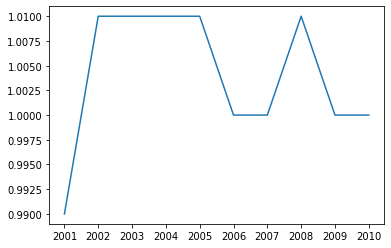

In [54]:
row1 = df.loc[1,['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

# plot the selected row
plt.plot(row1)

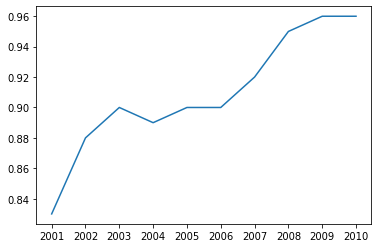

In [56]:
row2 = df.loc[2,['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

# plot the selected row
plt.plot(row2)

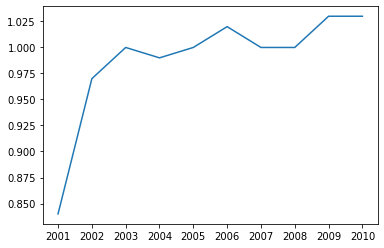

In [57]:
row3 = df.loc[3,['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]

# plot the selected row
plt.plot(row3)

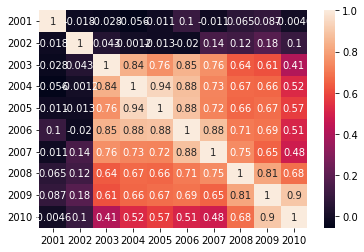

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/8.csv')

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
print (df)


In [ ]:
path = 'drive/My Drive/Colab Notebooks/8.csv'
import pandas as pd
df1 = pd.read_csv(path)
df1.rename(columns={'India/ State/ UTs':'States'},inplace=True)
df1

In [ ]:
df.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
df = sns.load_dataset('8.csv')
sns.barplot(x = 'states',y = '2001',data = df)

In [ ]:
import seaborn as sns
t=df[['2001','2002','2003']]
c=t.corr()
sns.heatmap(c,xticklabels=c.columns,annot=True)

Text(32.99999999999999, 0.5, 'State/ UT')

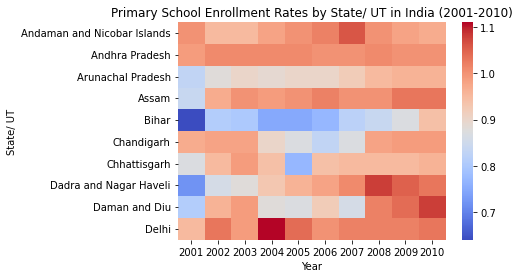

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a pandas DataFrame from the given data
data = {#'School Type': ['Primary School']*10,
        'India/ State/ UTs': ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi'],
        '2001': [1, 0.99, 0.83, 0.84, 0.64, 0.97, 0.87, 0.72, 0.81, 0.95],
        '2002': [0.95, 1.01, 0.88, 0.97, 0.81, 0.98, 0.95, 0.86, 0.96, 1.03],
        '2003': [0.95, 1.01, 0.9, 1, 0.8, 0.98, 0.99, 0.88, 0.99, 0.99],
        '2004': [0.98, 1.01, 0.89, 0.99, 0.75, 0.9, 0.94, 0.93, 0.88, 1.11],
        '2005': [1, 1.01, 0.9, 1, 0.75, 0.87, 0.77, 0.96, 0.87, 1.04],
        '2006': [1.02, 1, 0.9, 1.02, 0.77, 0.83, 0.94, 0.98, 0.92, 1],
        '2007': [1.06, 1, 0.92, 1, 0.82, 0.87, 0.95, 1.01, 0.86, 1.02],
        '2008': [1, 1.01, 0.95, 1, 0.84, 0.98, 0.95, 1.08, 1.02, 1.02],
        '2009': [0.98, 1, 0.96, 1.03, 0.87, 0.99, 0.95, 1.05, 1.04, 1.02],
        '2010': [0.97, 1, 0.96, 1.03, 0.94, 0.99, 0.96, 1.03, 1.08, 1.03]}
df = pd.DataFrame(data)

# set the index to be the 'India/ State/ UTs' column
df.set_index('India/ State/ UTs', inplace=True)

# create the heatmap
sns.heatmap(df, cmap='coolwarm')

# set the title and axis labels
plt.title('Primary School Enrollment Rates by State/ UT in India (2001-2010)')
plt.xlabel('Year')
plt.ylabel('State/ UT')






Performance Analysis

In [82]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = "drive/My Drive/Colab Notebooks/8.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,School Type,India/ State/ UTs,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Primary School,Andaman and Nicobar Islands,1.00,0.95,0.95,0.98,1.00,1.02,1.06,1.00,0.98,0.97
1,Primary School,Andhra Pradesh,0.99,1.01,1.01,1.01,1.01,1.00,1.00,1.01,1.00,1.00
2,Primary School,Arunachal Pradesh,0.83,0.88,0.90,0.89,0.90,0.90,0.92,0.95,0.96,0.96
3,Primary School,Assam,0.84,0.97,1.00,0.99,1.00,1.02,1.00,1.00,1.03,1.03
4,Primary School,Bihar,0.64,0.81,0.80,0.75,0.75,0.77,0.82,0.84,0.87,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...
66,Upper Primary School,Tamil Nadu,0.98,0.98,0.96,0.96,0.97,0.98,0.97,0.97,0.98,0.99
67,Upper Primary School,Tripura,0.87,0.94,0.93,0.94,0.99,1.00,1.00,0.99,1.00,0.99
68,Upper Primary School,Uttar Pradesh,0.50,0.80,0.80,0.80,0.79,0.79,0.90,0.90,0.89,0.90
69,Upper Primary School,Uttarakhand,0.95,0.93,0.98,1.00,1.01,1.02,1.04,1.07,1.07,1.07


In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [83]:
x=df.iloc[:, 2:-1].values
print(x[0:10])

[[1.   0.95 0.95 0.98 1.   1.02 1.06 1.   0.98]
 [0.99 1.01 1.01 1.01 1.01 1.   1.   1.01 1.  ]
 [0.83 0.88 0.9  0.89 0.9  0.9  0.92 0.95 0.96]
 [0.84 0.97 1.   0.99 1.   1.02 1.   1.   1.03]
 [0.64 0.81 0.8  0.75 0.75 0.77 0.82 0.84 0.87]
 [0.97 0.98 0.98 0.9  0.87 0.83 0.87 0.98 0.99]
 [0.87 0.95 0.99 0.94 0.77 0.94 0.95 0.95 0.95]
 [0.72 0.86 0.88 0.93 0.96 0.98 1.01 1.08 1.05]
 [0.81 0.96 0.99 0.88 0.87 0.92 0.86 1.02 1.04]
 [0.95 1.03 0.99 1.11 1.04 1.   1.02 1.02 1.02]]


In [87]:
y = df.iloc[:, -1].values
print(y[0:10])

[0.97 1.   0.96 1.03 0.94 0.99 0.96 1.03 1.08 1.03]


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)


In [104]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x_train,y_train)
print(x_test)

[[1.15 1.1  1.18 1.17 1.17 1.17 1.21 1.19 1.19]
 [0.82 0.98 0.97 0.87 0.88 0.87 0.87 0.98 0.98]
 [0.87 0.94 0.93 0.94 0.99 1.   1.   0.99 1.  ]
 [0.85 0.87 0.86 1.05 1.17 1.   0.92 0.97 1.1 ]
 [1.01 1.08 1.08 1.08 1.08 1.09 0.98 0.98 1.03]
 [0.66 0.84 0.85 0.88 0.88 0.89 0.93 0.94 0.96]
 [0.87 0.95 0.97 0.97 0.97 0.97 0.98 0.98 0.98]
 [0.97 0.93 0.91 1.06 1.07 0.97 0.91 0.96 0.97]
 [0.93 0.91 0.91 0.96 1.   1.03 1.01 1.19 1.04]
 [0.84 0.95 0.95 0.96 0.95 0.96 0.98 0.98 0.98]
 [0.83 0.88 0.9  0.89 0.9  0.9  0.92 0.95 0.96]
 [0.79 0.97 0.93 0.93 0.93 0.94 0.98 1.04 1.04]
 [0.95 0.95 0.96 0.95 0.95 0.96 0.97 0.96 0.96]
 [ nan  nan  nan  nan  nan 0.9  0.91 0.93 0.94]
 [0.62 0.66 0.69 0.74 0.75 0.73 0.81 0.94 0.94]
 [0.86 0.99 0.94 0.94 0.93 0.93 0.94 0.93 0.93]
 [0.99 1.05 1.03 1.06 1.05 1.03 0.96 0.97 1.  ]
 [0.9  0.92 0.93 0.95 0.97 0.96 0.97 0.97 0.96]]


In [116]:
import numpy
x_test = np.delete(x_test,12,0)
print(x_test)

[[1.15 1.1  1.18 1.17 1.17 1.17 1.21 1.19 1.19]
 [0.82 0.98 0.97 0.87 0.88 0.87 0.87 0.98 0.98]
 [0.87 0.94 0.93 0.94 0.99 1.   1.   0.99 1.  ]
 [0.85 0.87 0.86 1.05 1.17 1.   0.92 0.97 1.1 ]
 [1.01 1.08 1.08 1.08 1.08 1.09 0.98 0.98 1.03]
 [0.66 0.84 0.85 0.88 0.88 0.89 0.93 0.94 0.96]
 [0.87 0.95 0.97 0.97 0.97 0.97 0.98 0.98 0.98]
 [0.97 0.93 0.91 1.06 1.07 0.97 0.91 0.96 0.97]
 [0.93 0.91 0.91 0.96 1.   1.03 1.01 1.19 1.04]
 [0.84 0.95 0.95 0.96 0.95 0.96 0.98 0.98 0.98]
 [0.83 0.88 0.9  0.89 0.9  0.9  0.92 0.95 0.96]
 [0.79 0.97 0.93 0.93 0.93 0.94 0.98 1.04 1.04]]


In [117]:
y_pred = model.predict(x_test)

In [124]:
print(df)

             School Type            India/ State/ UTs  2001  2002  2003  2004  \
0         Primary School  Andaman and Nicobar Islands  1.00  0.95  0.95  0.98   
1         Primary School               Andhra Pradesh  0.99  1.01  1.01  1.01   
2         Primary School            Arunachal Pradesh  0.83  0.88  0.90  0.89   
3         Primary School                        Assam  0.84  0.97  1.00  0.99   
4         Primary School                        Bihar  0.64  0.81  0.80  0.75   
..                   ...                          ...   ...   ...   ...   ...   
66  Upper Primary School                   Tamil Nadu  0.98  0.98  0.96  0.96   
67  Upper Primary School                      Tripura  0.87  0.94  0.93  0.94   
68  Upper Primary School                Uttar Pradesh  0.50  0.80  0.80  0.80   
69  Upper Primary School                  Uttarakhand  0.95  0.93  0.98  1.00   
70  Upper Primary School                  West Bengal  0.78  0.92  0.95  0.91   

    2005  2006  2007  2008 

# KNN Classification

In [142]:
df.dropna(inplace = True)
x=df.iloc[:, 2:12].values


In [143]:
#Encode the categorical value of the target column 'test preparation course' to numerical value
df['School Type']= df['School Type'].replace({'Primary School':0, 'Upper Primary School':1})

In [144]:
#Use the target variable as 'test preparation course'
y = df.iloc[:,0].values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [145]:
#train a model on a portion of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [146]:
#scaleing numerical data to a common range
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

In [147]:
#Perform the classification with K=3
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
print(x_test)

[[-0.12958841 -0.13640512  0.24070798  0.16013304  0.30625326  0.3103852
   0.09561436 -0.16984096 -0.10146836 -0.02506667]
 [-0.14327084 -0.13640512  0.34415273 -0.75379699 -0.65566973 -0.92253378
  -1.06065231 -0.05049326 -0.10146836 -0.18800004]
 [-0.13899508 -0.13946875 -0.06962627 -0.04296252  0.52001392  0.53455228
   0.44249436  0.06885444  0.21831071 -0.02506667]
 [-0.15695328 -0.15785052 -1.93163178 -0.85534477 -0.76255006 -0.69836669
  -0.48251897 -0.64723176 -0.58113696  0.46373343]
 [-0.12702296 -0.12874605  1.48204498  1.37870641  1.48193691  1.54330417
   0.21124103 -0.05049326  0.69797931 -0.02506667]
 [-0.15695328 -0.14712782 -0.89718428 -0.65224921 -0.65566973 -0.69836669
  -0.36689231 -0.52788406 -0.42124743 -0.35093341]
 [-0.14840176 -0.14636191 -0.89718428 -0.95689255 -1.29695172 -1.4829515
  -1.63878564 -0.40853636 -0.58113696 -0.51386678]
 [-0.13985024 -0.14100056 -0.06962627  0.05858526  0.19937293  0.19830165
   0.21124103  0.06885444  0.05842118  0.1378667 ]
 [

In [148]:
#prediction of test preparation course completion
y_pred = knn.predict(x_test)
print(y_test)
print('\n')
print(y_pred)

[1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1]


[0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0]


Logistic Regression: ROC AUC=0.903
Cross-validated accuracy: 0.841 +/- 0.019


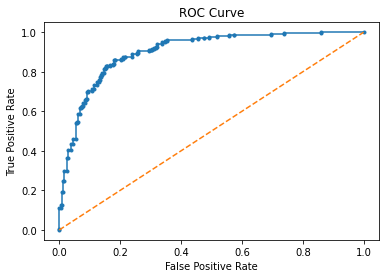

In [149]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, f1_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score


# Generate simulated binary classification data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Split the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2)

# Train a logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)

# Evaluate the model's performance on the test set
lr_probs = model.predict_proba(test_X)[:, 1]
lr_auc = roc_auc_score(test_y, lr_probs)
print('Logistic Regression: ROC AUC=%.3f' % lr_auc)

# Use cross-validation to get a more accurate estimate of the model's performance
scores = cross_val_score(model, X, y, cv=5)
print('Cross-validated accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Visualize the ROC curve
fpr, tpr, _ = roc_curve(test_y, lr_probs)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [150]:
# generate some example data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform feature scaling on the independent variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculate the recall
recall = recall_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# calculate the specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

f_score = 2 * (precision * recall) / (precision + recall)

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc_score = auc(fpr, tpr)

print("Confusion Matrix:\n", cm.round(3))
print("Accuracy:", accuracy.round(3))
print("Recall:", recall.round(3))
print("Precision:", precision.round(3))
print("Specificity:", specificity.round(3))
print("F-score:", f_score.round(3))
print("AUC score:", auc_score.round(3))

Confusion Matrix:
 [[75 14]
 [20 91]]
Accuracy: 0.83
Recall: 0.82
Precision: 0.867
Specificity: 0.843
F-score: 0.843
AUC score: 0.913
